In [248]:
import pandas as pd
import numpy as np

df=pd.read_csv('../DATA/combined_data.csv')


## Performing ARIMA on Immigrant Population Percentage Data

<Axes: >

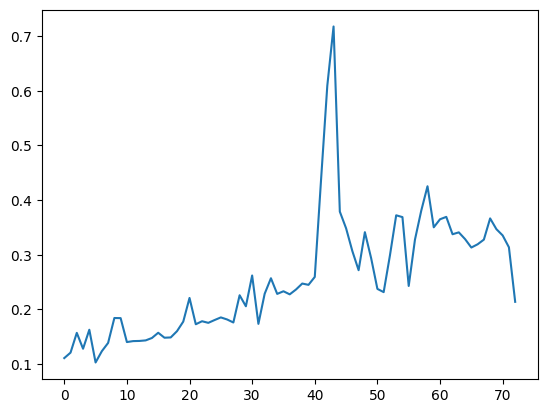

In [249]:
df1 = df["migrant_pop_percentage"]
df1.plot()



<Axes: >

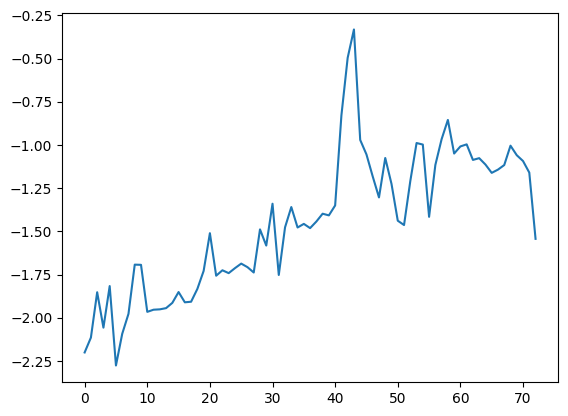

In [250]:

df1 = np.log(df1)

df1.plot()

In [251]:
# training set
msk = (df1.index < len(df1)-15)
df_train = df1[msk].copy()
df_test = df1[~msk].copy()

## Check for Stationarity

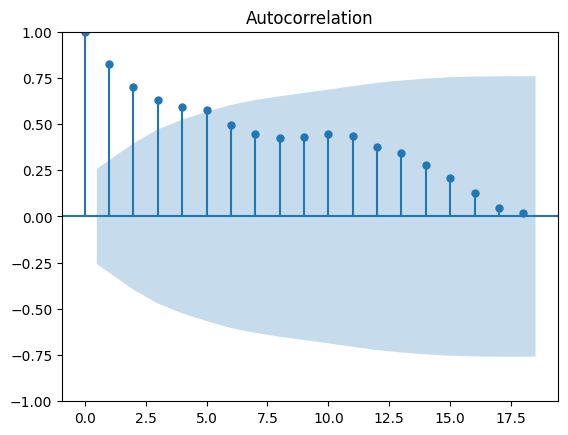

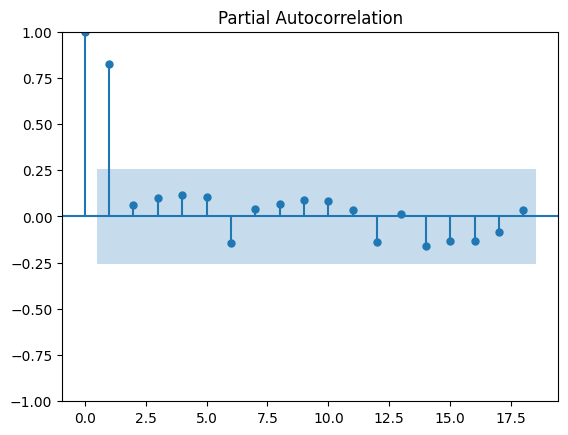

In [252]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

acf_original = plot_acf(df_train)
pacf_original = plot_pacf(df_train)

In [253]:
from statsmodels.tsa.stattools import adfuller
adf_test = adfuller(df_train)
print(f'p-value: {adf_test[1]}')

p-value: 0.24383978217863933


The ACF has a positive decline, and the PACF has a spike at the beginning, so these indicate the data are not stationary. Additionally, the p-value is way too high. So let's transform da time series to stationary by differencing!

## Stationarity: Differencing

<Axes: >

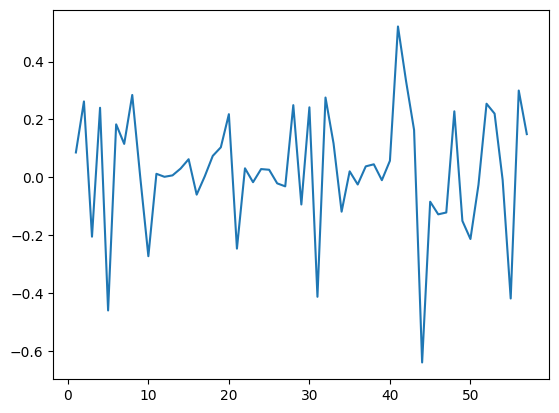

In [254]:
df_train_diff = df_train.diff().dropna()
df_train_diff.plot()

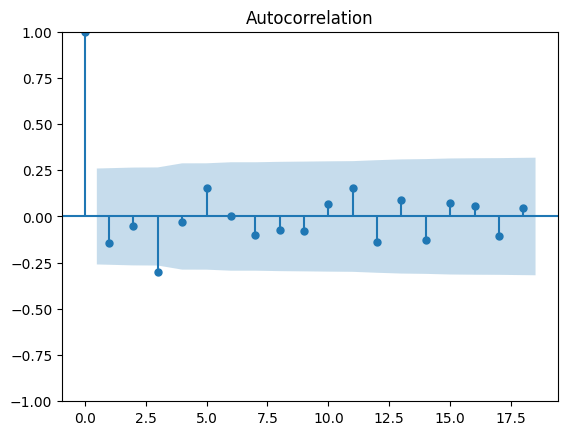

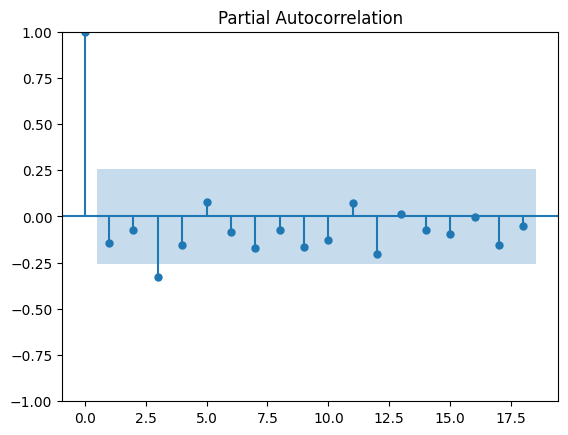

In [255]:
acf_diff = plot_acf(df_train_diff)
pacf_diff = plot_pacf(df_train_diff)

In [256]:


adf_test = adfuller(df_train_diff)
print(f'p-value: {adf_test[1]}')

p-value: 2.830959441827075e-08


## Determining ARIMA models parameters p,q

In [257]:
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(df_train, order=(1,1,0))
model_fit = model.fit()
print(model_fit.summary())

                                 SARIMAX Results                                  
Dep. Variable:     migrant_pop_percentage   No. Observations:                   58
Model:                     ARIMA(1, 1, 0)   Log Likelihood                   8.570
Date:                    Thu, 24 Oct 2024   AIC                            -13.141
Time:                            23:09:28   BIC                             -9.055
Sample:                                 0   HQIC                           -11.553
                                     - 58                                         
Covariance Type:                      opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1302      0.119     -1.094      0.274      -0.364       0.103
sigma2         0.0433      0.007      6.126      0.000       0.029       0.057
Ljung-Box (L1) (Q): 

## Residuals

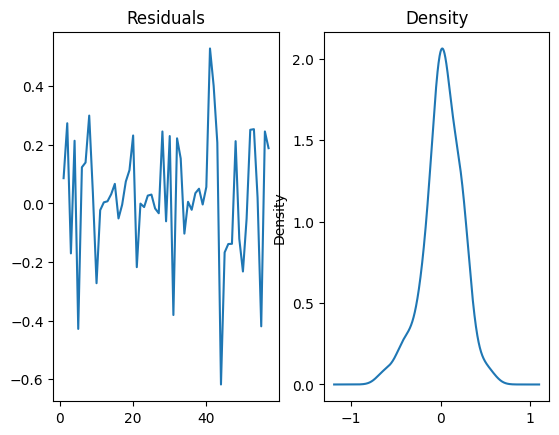

In [258]:
import matplotlib.pyplot as plt
residuals = model_fit.resid[1:]
fig, ax = plt.subplots(1,2)
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(title="Density", kind="kde", ax=ax[1])
plt.show()



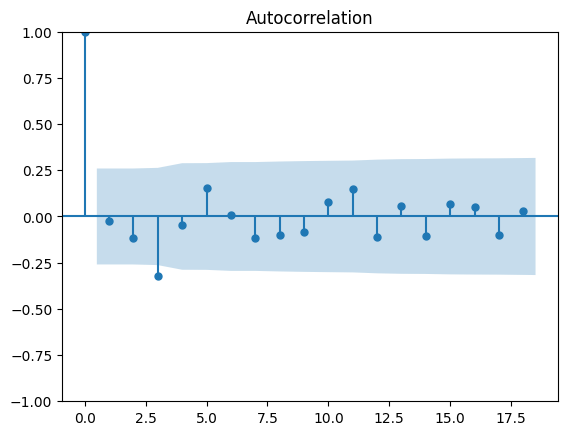

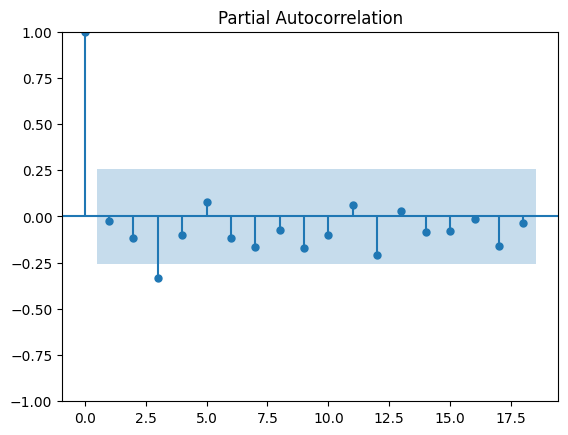

In [259]:
# acf and pacf of residuals
acf_residual = plot_acf(residuals)
pacf_residual = plot_pacf(residuals)

## Performing ARIMA on GDP Percent Change data

<Axes: >

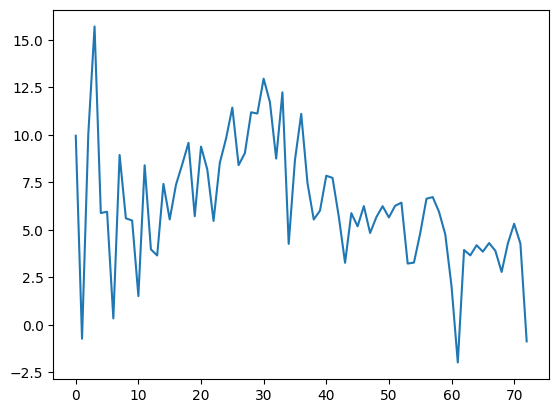

In [260]:
df2 = df["GDP_PC1"]
df2.plot()

In [261]:

# training set
msk = (df2.index < len(df2)-15)
df_train = df2[msk].copy()
df_test = df2[~msk].copy()

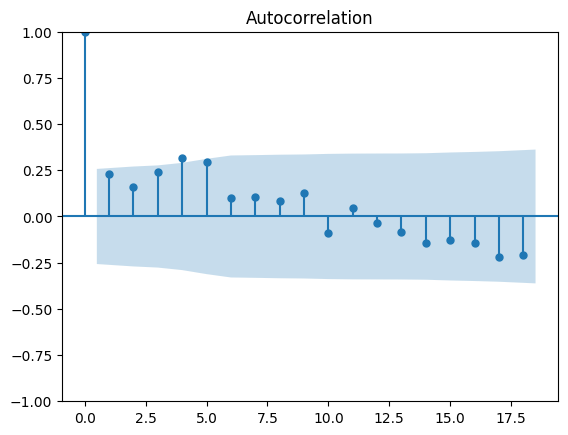

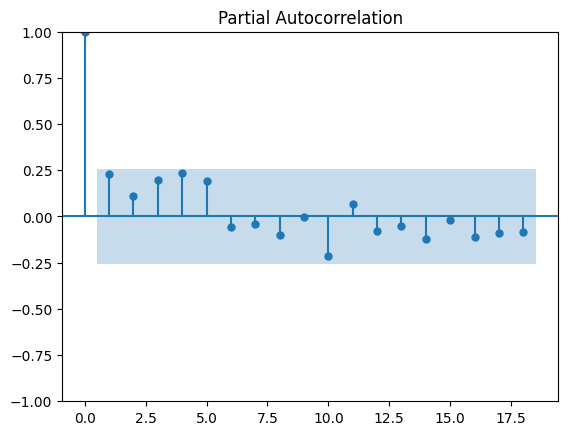

In [262]:

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

acf_original = plot_acf(df_train)
pacf_original = plot_pacf(df_train)

In [263]:

from statsmodels.tsa.stattools import adfuller
adf_test = adfuller(df_train)
print(f'p-value: {adf_test[1]}')

p-value: 0.06866447902289659


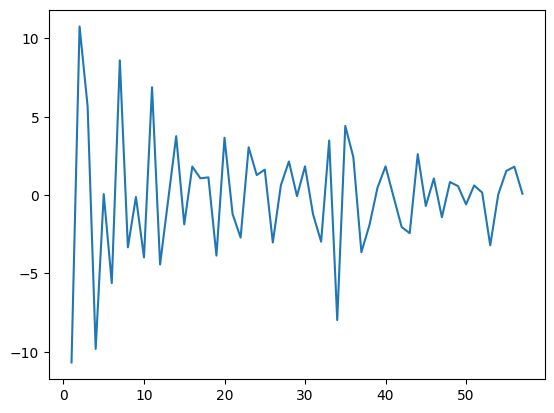

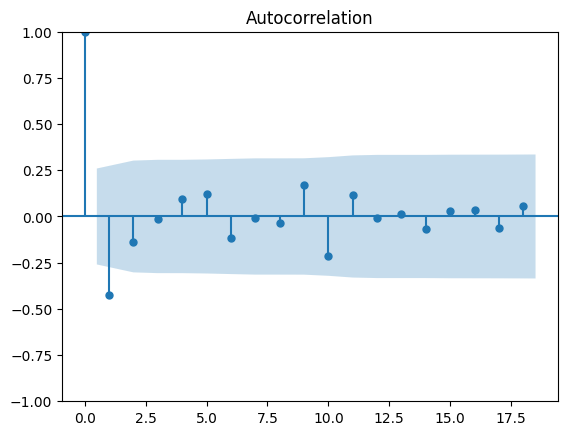

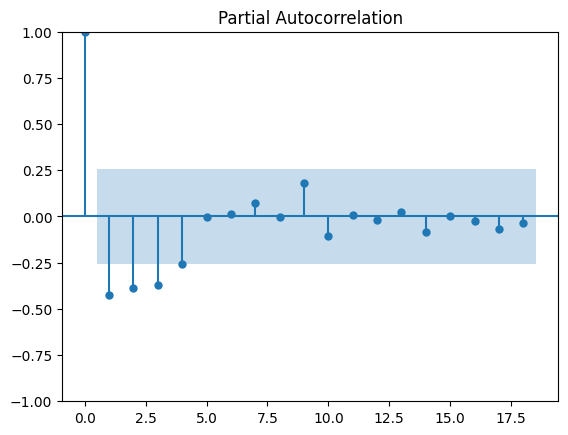

In [264]:
df_train_diff = df_train.diff().dropna()
df_train_diff.plot()

acf_diff = plot_acf(df_train_diff)
pacf_diff = plot_pacf(df_train_diff)


In [265]:
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(df_train, order=(1,1,1))
model_fit = model.fit()
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                GDP_PC1   No. Observations:                   58
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -142.631
Date:                Thu, 24 Oct 2024   AIC                            291.262
Time:                        23:09:29   BIC                            297.391
Sample:                             0   HQIC                           293.644
                                 - 58                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0634      0.136     -0.466      0.641      -0.330       0.203
ma.L1         -0.7562      0.155     -4.870      0.000      -1.061      -0.452
sigma2         8.5860      1.521      5.645      0.0

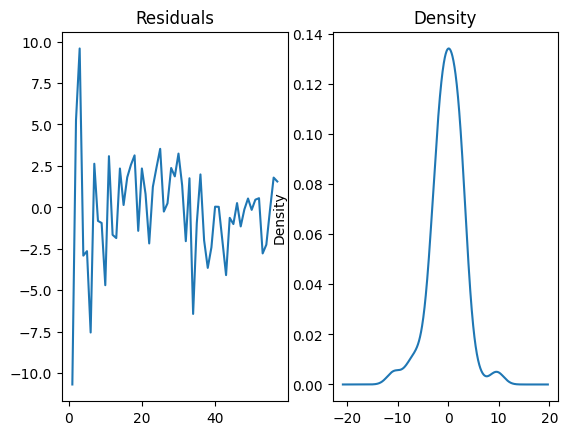

In [266]:
# residuals
import matplotlib.pyplot as plt
residuals = model_fit.resid[1:]
fig, ax = plt.subplots(1,2)
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(title="Density", kind="kde", ax=ax[1])
plt.show()

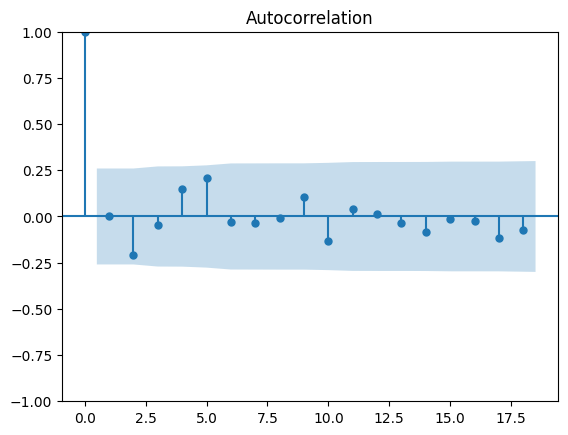

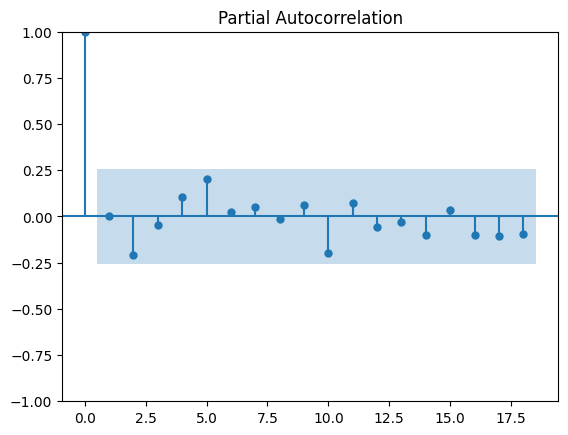

In [267]:
# acf and pacf of residuals
acf_residual = plot_acf(residuals)
pacf_residual = plot_pacf(residuals)

## Performing ARIMA on Unemployment Rate

<Axes: >

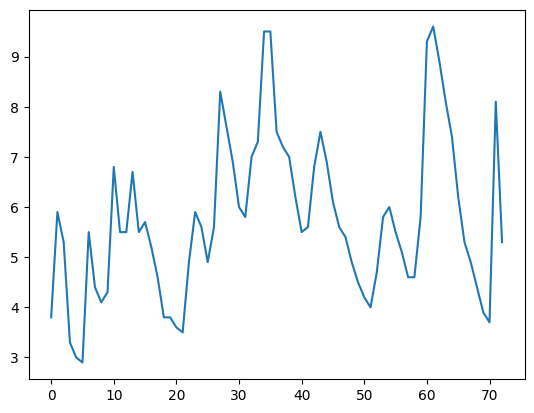

In [268]:
df3 = df["Unemployment_rate"]
df3.plot()

In [269]:
msk = (df3.index < len(df3)-15)
df_train = df3[msk].copy()
df_test = df3[~msk].copy()

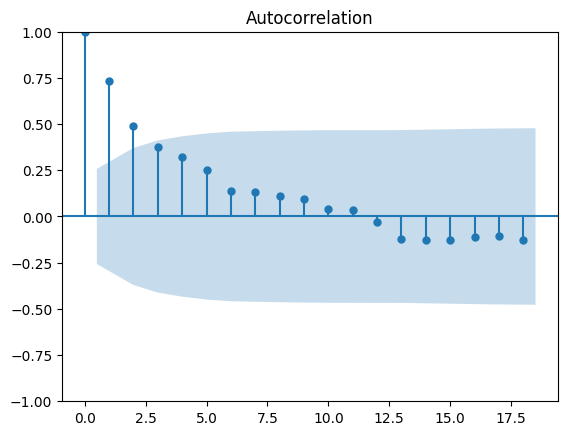

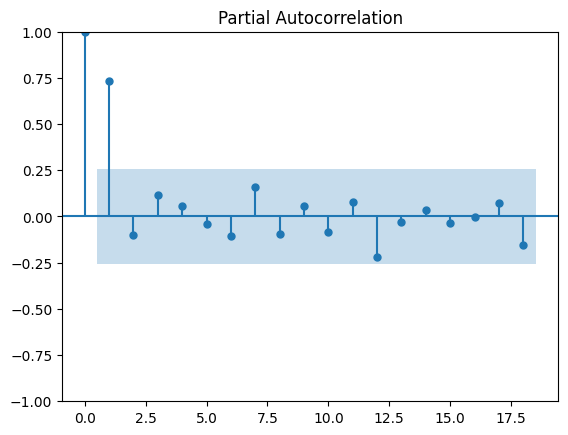

In [270]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

acf_original = plot_acf(df_train)
pacf_original = plot_pacf(df_train)

In [271]:

from statsmodels.tsa.stattools import adfuller
adf_test = adfuller(df_train)
print(f'p-value: {adf_test[1]}')

p-value: 0.04592847593034503


In [272]:
# df_train_diff = df_train.diff().dropna()
# df_train_diff.plot()

# acf_diff = plot_acf(df_train_diff)
# pacf_diff = plot_pacf(df_train_diff)

In [273]:
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(df_train, order=(1,0,2))
model_fit = model.fit()
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:      Unemployment_rate   No. Observations:                   58
Model:                 ARIMA(1, 0, 2)   Log Likelihood                 -79.126
Date:                Thu, 24 Oct 2024   AIC                            168.253
Time:                        23:09:29   BIC                            178.555
Sample:                             0   HQIC                           172.266
                                 - 58                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.4547      0.616      8.856      0.000       4.247       6.662
ar.L1          0.7745      0.203      3.807      0.000       0.376       1.173
ma.L1          0.0907      0.282      0.321      0.7

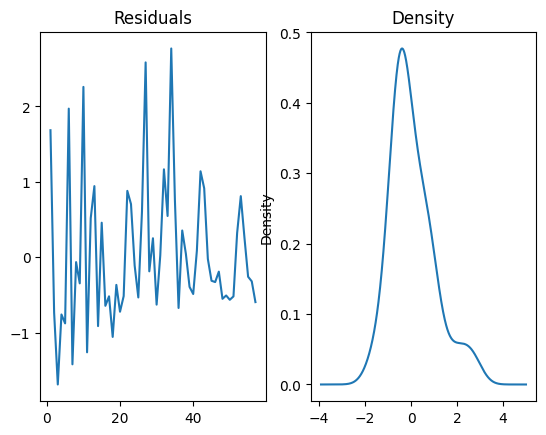

In [274]:
# residuals
import matplotlib.pyplot as plt
residuals = model_fit.resid[1:]
fig, ax = plt.subplots(1,2)
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(title="Density", kind="kde", ax=ax[1])
plt.show()

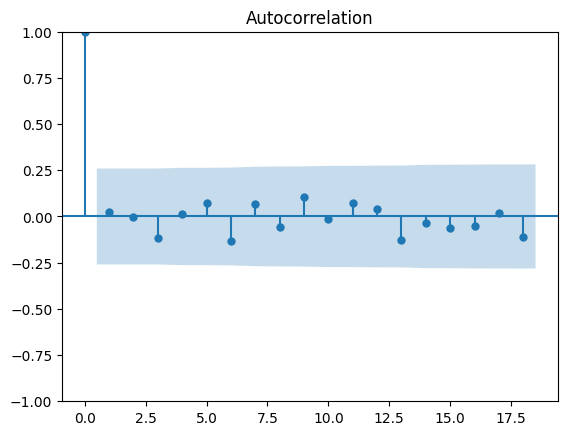

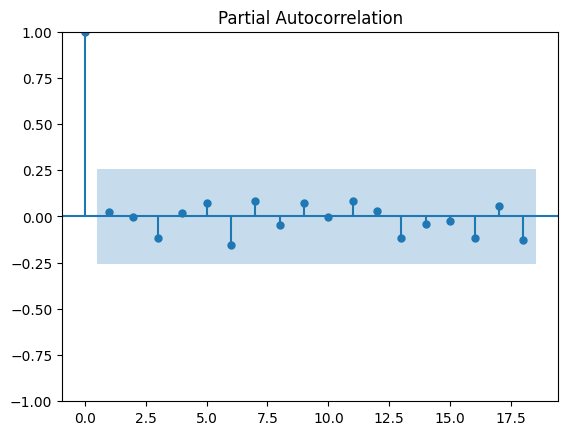

In [275]:
# acf and pacf of residuals
acf_residual = plot_acf(residuals)
pacf_residual = plot_pacf(residuals)